In [18]:
from amuse.io import read_set_from_file, write_set_to_file
from amuse.community.huayno.interface import Huayno
from amuse.units import units, nbody_system

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [19]:
results = np.load('test_results.npy')
results

array([(   1.,  0.        ,  0.        ,  0.        , 2),
       (   1.,  0.        ,  0.        ,  0.6981317 , 2),
       (   1.,  0.        ,  0.        ,  1.3962634 , 2), ...,
       ( 100.,  6.28318531,  3.14159265,  4.88692191, 2),
       ( 100.,  6.28318531,  3.14159265,  5.58505361, 2),
       ( 100.,  6.28318531,  3.14159265,  6.28318531, 2)],
      dtype=[('v_inf', '<f8'), ('phi', '<f8'), ('theta', '<f8'), ('psi', '<f8'), ('state', '<i8')])

ffpm: 2574 0.2574
ffpwm: 847 0.0847
other: 6579 0.6579


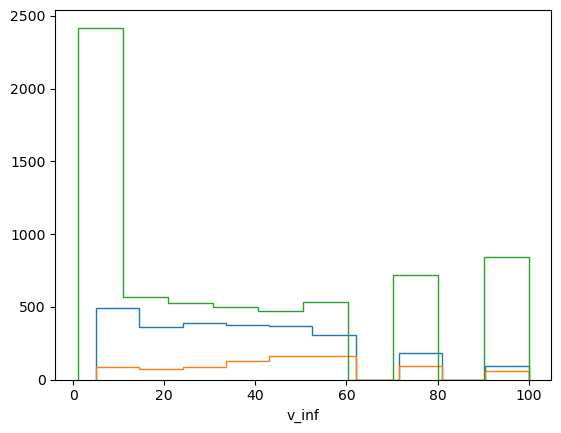

In [20]:
ffpm = results[results['state'] == 1]
ffpwm = results[results['state'] == 0]
other = results[results['state'] == 2]

print('ffpm:', len(ffpm), len(ffpm)/len(results))
print('ffpwm:', len(ffpwm), len(ffpwm)/len(results))
print('other:', len(other), len(other)/len(results))

plt.hist(ffpm['v_inf'], histtype='step', label='ffpm')
plt.hist(ffpwm['v_inf'], histtype='step', label='ffpwm')
plt.hist(other['v_inf'], histtype='step', label='other')
plt.xlabel('v_inf')
plt.show()

In [21]:
fractions = {}

for v_inf in np.unique(results['v_inf']):
    v_inf = str(int(v_inf))
    fractions[v_inf] = []
    for state in range(3):
        mask = results['v_inf'] == int(v_inf)
        mask &= results['state'] == state
        fractions[v_inf].append(10*len(results[mask])/len(results))

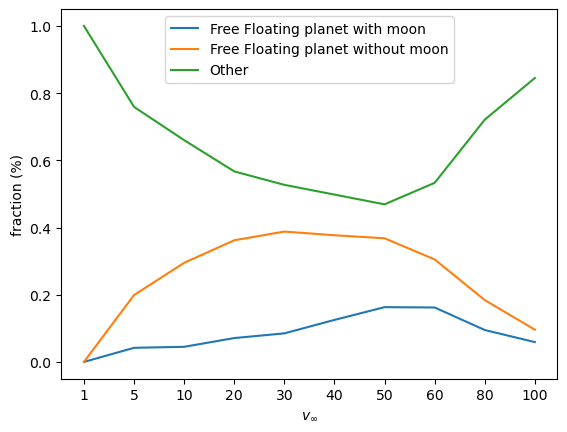

In [ ]:
#plot this as a function of v_inf
plt.plot(fractions.keys(), [f[0] for f in fractions.values()], label='Free Floating planet with moon')
plt.plot(fractions.keys(), [f[1] for f in fractions.values()], label='Free Floating planet without moon')
plt.plot(fractions.keys(), [f[2] for f in fractions.values()], label='Other')
plt.legend()
plt.xlabel(r'$v_\infty$')
plt.ylabel('Fraction')
plt.show()